In [2]:
# imports
import pandas as pd
import os
import kagglehub
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

# import kaggle 

In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# imports
import pandas as pd
# import os
# import kagglehub
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import scipy

# import kaggle 

In [13]:
import pickle

with open("edges_df_sorted.pk1", "rb") as f:
    edges_df_sorted = pickle.load(f)

with open("edges_df.pk1", "rb") as f:
    edges_df = pickle.load(f)
    
with open("df_aggregated.pk1", "rb") as f:
    df_aggregated = pickle.load(f)




In [9]:
edges_df

,Disease1,Disease2,Weight
0,abdominal aortic aneurysm,abdominal hernia,0.129099
1,abdominal aortic aneurysm,abscess of the lung,0.204124
2,abdominal aortic aneurysm,acute bronchiolitis,0.117851
3,abdominal aortic aneurysm,acute bronchitis,0.117851
4,abdominal aortic aneurysm,acute bronchospasm,0.123091
...,...,...,...
66556,white blood cell disease,whooping cough,0.298142
66557,white blood cell disease,wilson disease,0.192450
66558,white blood cell disease,yeast infection,0.111111
66559,whooping cough,wilson disease,0.258199


In [6]:
G = nx.Graph()

for _, row in edges_df.iterrows():
    G.add_edge(row["Disease1"], row["Disease2"], weight=row["Weight"])


In [7]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

In [12]:
print("Top 5 diseases by Degree Centrality:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
#these diseases have the highest number of direct symptom based connections to other diseases

#Drug reaction:
    #high connectivity suggests drug-induced conditions are frequently misdiagnosed as other illnesses.
    
#Pain after an operation:
    #Post operation pain is common across many surgical procedures and may be mistaken for underlying infections or some other issues
    
#Shingles:
    #High centrality suggests it may often be confused with other viral infections or autoimmune conditions.
    
#Acute Stress Reaction:
    #indicates stress-related symptoms might contribute to misdiagnosis of physical diseases.
    



Top 5 diseases by Degree Centrality: [('hypokalemia', 0.522020725388601), ('drug reaction', 0.5077720207253886), ('pain after an operation', 0.5051813471502591), ('shingles (herpes zoster)', 0.49093264248704666), ('acute stress reaction', 0.48704663212435234)]


In [13]:
print("Top 5 diseases by Betweenness Centrality:", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

#Shingles:
    #Shingles has symptoms (nerve pain, rashes, fever) that overlap with both viral infections and autoimmune conditions.
    #This suggests shingles acts as a key diagnostic confusion point, potentially being mistaken for other neurological, dermatological, or viral illnesses.
    
#Parasitic disease:
    #Many parasitic diseases have vague symptoms (abdominal pain, diarrhea, fatigue), which means they might connect conditions like food poisoning, viral infections, and malabsorption disorders.
    
#Drug Reaction:
    #High betweenness suggests that drug reactions bridge multiple medical conditions, leading to frequent confusion with infections, allergies, or autoimmune issues.
    
#These diseases connect different clusters, making them major misdiagnosis risks.
#Doctors should carefully differentiate these from diseases in both of their clusters.



Top 5 diseases by Betweenness Centrality: [('shingles (herpes zoster)', 0.008302474423198791), ('lyme disease', 0.006565076328624316), ('parasitic disease', 0.005502711106188218), ('lymphadenitis', 0.005303623907557194), ('drug reaction', 0.005164641297152865)]


In [14]:
print("Top 5 diseases by Closeness Centrality:", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
#These diseases are highly reachable in the network, meaning they are common misdiagnosis or differential diagnosis candidates.
#Doctors should always consider these diseases in diagnostic decisions since they connect to many symptomatically similar conditions.
#These diseases may be important in machine learning models for automated diagnosis, as they likely appear as early-stage possibilities in differential diagnoses.



Top 5 diseases by Closeness Centrality: [('hypokalemia', 0.6765994741454864), ('drug reaction', 0.6701388888888888), ('pain after an operation', 0.6689774696707106), ('shingles (herpes zoster)', 0.6626609442060086), ('acute stress reaction', 0.660958904109589)]


In [15]:
print("Top 5 diseases by Eigenvector Centrality:", sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


#Since it is so interconnected, doctors should always consider checking for underlying causes of hypokalemia, as it may be a secondary symptom of another major condition.

#understanding postoperative symptom patterns could help reduce unnecessary tests and avoid confusion with unrelated conditions.

#These diseases act as key “hubs” in the network, influencing diagnosis patterns across multiple categories.
#Diseases with high eigenvector centrality may serve as key “signals” in differential diagnosis algorithms.
#Misdiagnosis risks are high when these diseases are confused with others that have similar symptoms but different underlying causes.

Top 5 diseases by Eigenvector Centrality: [('hypokalemia', 0.0820095696120754), ('pain after an operation', 0.07735926826671709), ('gastritis', 0.07639006170018713), ('drug reaction', 0.07499439055255328), ('acute kidney injury', 0.07408833976707525)]


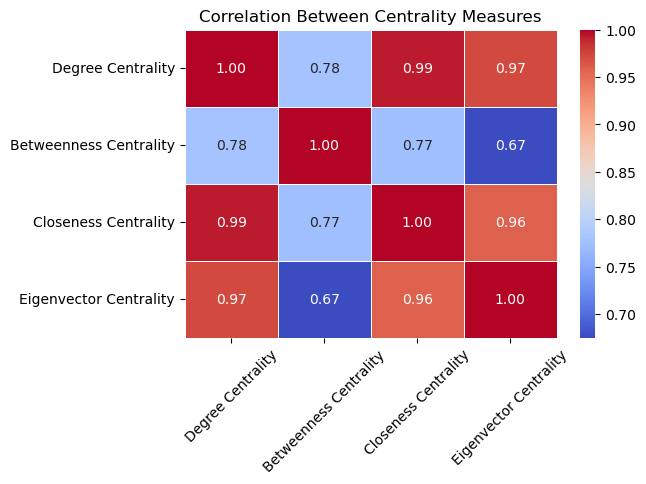

In [8]:


# dataframe with centrality values for different diseases
df = pd.DataFrame({
    "Disease": list(G.nodes()),
    "Degree Centrality": [degree_centrality[n] for n in G.nodes()],
    "Betweenness Centrality": [betweenness_centrality[n] for n in G.nodes()],
    "Closeness Centrality": [closeness_centrality[n] for n in G.nodes()],
    "Eigenvector Centrality": [eigenvector_centrality[n] for n in G.nodes()]
})

#remove the disease column so we don't use it for the correlation calculations
corr = df.drop(columns="Disease").corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Centrality Measures")
plt.xticks(rotation = 45)
plt.show()

#degree centrality and closeness centrality have 0.99, almost a perfect correlation. 
    #so diseases that have many direct connections or high degree, also tend to be close to other diseases in the network
    #this means highly connected diseases can quickly reach others within the network 
#degree centrality and eigenvector centrality have 0.97, almost a perfect correlation. 
    #diseases that are well connected and have high degree, and are also connected to other highly influential diseases
    #so hubs in the network are also likely to be influential when it comes to connections
#closeness centrality and eigenvector centrality have 0.96
    #nodes that are closer to all othe rnodes are also in well-connected cores of the network
    #network structure then indicates there are some well-connected components
    
#betweenness centrality and degree centrality have 0.78
    #diseases with high degree centrality can sometimes also act as bridges in the network
    #not all highly connected nodes are important bridges
    
#betweeness centrality and closeness centrality have 0.77
    #some central nodes are critical for shortest paths, but not all 
    #if a disease is central, but doesn't act as a bridge between clusters, it would have lower betweenness

#betweeness centrality and eigenvector centrality have 0.67
    #means that the most influential diseases are not necessarily the key bridges in the network
    #some diseases could be central within the community but do not play a major role in connecting different disease groups
    
#high correlation between the degree, closeness and eigenvector centrality could mean that the network has a strong core of diseases that are both highly connected and influential 
#diseases in this cluster could influence a lot of the network

#due to the moderate correlation between betweeness and the other ones, it might mean that some bridging diseases like shingles may not be the most directly connected diseases
#they could play a role in linking different clusters of diseases



In [25]:

# Get the top number diseases for each centrality measure
top_n = 10

# Core Diseases: Highest in Degree, Closeness, and Eigenvector Centrality
core_diseases = df.nlargest(top_n, ["Degree Centrality", "Closeness Centrality", "Eigenvector Centrality"])

#top betweenness but smallest degree centrality
bridge_diseases = df.nlargest(top_n, "Betweenness Centrality").nsmallest(top_n, "Degree Centrality")

print("Core Diseases (Top 3 in Degree, Closeness, and Eigenvector Centrality):")
print(core_diseases)

print("\nKey Bridge Diseases (High Betweenness, Moderate Degree):")
# print(bridge_diseases)

#the core diseases: hypokalemia, drug reaction, and pain after an operation:
    #they interact with many other diseases in the network, and because they have high cloeness centrality, they can reach other diseases through a small number of steps
    #eigenvector is also high, so they are not only well-connected, but also connected to other influential diseases
    #diseases could be served as key hubs for multiple medical issues, and monitoring these diseases could have effects on other conditions
    #ex: hypokalemia is low potassium levels, and is linked to other issues like muscle weakness and kidney dysfunction. Monitoring this in potentially at-risk patients could help prevent other complications
    #pain after an operation could lead to chronic pain, pain killer dependence or psychological stress. Monitoring post-operation pain can help with proper pain management and reduces long term health risks
        #however, pain after an operation could just be a normal issue after any kind of operation, so it may not be worth going into further
    #these diseases are frequently confused with many other conditions due to symptom overlap, so they are high risk of misdiagnosis, which could result in delayed or wrong treatment. 
    #doctors should always consider alternative diagnoses when encountering these conditions
    #patients that are showing symptoms that are related to these symptoms should go through detailed evaluations to rule out other illnesses
    #if a patient has one of these diseases, though we can't say if they would develop other diseases, it suggests that multiple potential diagnoses would need to be ruled out
    #ex: someone diagnosed with hypokalemia, might also be evaluated for chronic kidney disease, metabolic disorders 
    #some of these diseases could be connections betweeen different medical specializations. So again with hypokalemia, different doctors under different specializations would need to collaborate when treating this because of it's connections to multiple organs or medical areas
    
        
        
    
    
#some bridge diseases with high betweenness but lower degree was parasitic disease, lyme disease, and shingles
    #these roles play a big role in connecting different clusters
    #these diseases couldd spread between different medical conditions. 
    #diseases could be targeted to break links between multiple disease clusters. 
    #since these diseases connect seperate symptom groups, they also could require multi-area expertise
    #ex: lyme disease starts as an infectious disease but progresses to joint. misdiagnosis could delay treatment, and have long-term nerve damage
    #they might be harder to classify initially because they share symptoms with a wide variety of diseases. and could be mistakenly looked at as a common condition
    #ex: parasitic disease, could mimic common intestinal issues, which again leads to delayed treatment
    
    


Core Diseases (Top 3 in Degree, Closeness, and Eigenvector Centrality):
                      Disease  Degree Centrality  Betweenness Centrality  \
124               hypokalemia           0.522021                0.003372   
73              drug reaction           0.507772                0.005165   
185   pain after an operation           0.505181                0.003807   
227  shingles (herpes zoster)           0.490933                0.008302   
10      acute stress reaction           0.487047                0.003620   
7         acute kidney injury           0.475389                0.003314   
95                  gastritis           0.470207                0.002229   
230        sickle cell crisis           0.468912                0.005163   
199          pleural effusion           0.467617                0.002533   
368              lyme disease           0.462435                0.006565   

     Closeness Centrality  Eigenvector Centrality  
124              0.676599              

In [26]:
# Find the correct indices for high centrality diseases
disease_names_to_find = [
    "hypokalemia", 
    "drug reaction", 
    "pain after an operation", 
    "shingles ", 
    "acute stress reaction",
    "acute kidney injury", 
    "gastritis", 
    "sickle cell crisis",
    "pleural effusion",
    "lyme disease"
    
    
]

# Find the indices of these diseases in DataFrame
found_indices = []
for disease_name in disease_names_to_find:
    # Look for exact or partial matches
    matches = df_aggregated[df_aggregated['diseases'].str.contains(disease_name, case=False, na=False)]
    if not matches.empty:
        print(f"Found {len(matches)} matches for '{disease_name}':")
        for idx, name in zip(matches.index, matches['diseases']):
            print(f"  Index {idx}: {name}")
        found_indices.append(matches.index[0])  # Take the first match
    else:
        print(f"No matches found for '{disease_name}'")

#  matches
if found_indices:
    print(f"\nFound {len(found_indices)} matches out of {len(disease_names_to_find)} diseases")
    
else:
    print("\nNo match.")
    print(":")
    
    sample_size = min(20, len(df_aggregated))
    sampled_diseases = df_aggregated.sample(sample_size)
    
    print("\nSample of diseases in your DataFrame:")
    for idx, disease in zip(sampled_diseases.index, sampled_diseases['diseases']):
        print(f"Index {idx}: {disease}")

Found 1 matches for 'hypokalemia':
  Index 352: hypokalemia
Found 1 matches for 'drug reaction':
  Index 205: drug reaction
Found 1 matches for 'pain after an operation':
  Index 527: pain after an operation
Found 1 matches for 'shingles ':
  Index 647: shingles (herpes zoster)
Found 1 matches for 'acute stress reaction':
  Index 20: acute stress reaction
Found 1 matches for 'acute kidney injury':
  Index 15: acute kidney injury
Found 1 matches for 'gastritis':
  Index 283: gastritis
Found 1 matches for 'sickle cell crisis':
  Index 651: sickle cell crisis
Found 1 matches for 'pleural effusion':
  Index 563: pleural effusion
Found 1 matches for 'lyme disease':
  Index 427: lyme disease

Found 10 matches out of 10 diseases


In [28]:
import networkx as nx
import pandas as pd
import numpy as np
from collections import Counter

# hand picked the indices 
high_centrality_indices = [352, 205, 527, 647, 20, 15, 283, 651, 563, 427]
high_centrality_profiles = df_aggregated.iloc[high_centrality_indices]


# drop the 'diseases' column before working with the symptoms
symptom_data = high_centrality_profiles.drop('diseases', axis=1)

# identify common symptoms among high centrality diseases
#  sum across rows to see which symptoms appear in multiple diseases
symptom_counts = symptom_data.sum(axis=0)
# Filter symptoms that appear in at least 2 of the high centrality diseases
common_symptoms = symptom_counts[symptom_counts >= 2].sort_values(ascending=False)

print("\nTop symptoms shared by multiple high-centrality diseases:")
for symptom, count in common_symptoms.head(15).items():
    print(f"{symptom}: found in {count}/{len(high_centrality_indices)} high-centrality diseases")



Top symptoms shared by multiple high-centrality diseases:
sharp chest pain: found in 8/10 high-centrality diseases
headache: found in 7/10 high-centrality diseases
sharp abdominal pain: found in 6/10 high-centrality diseases
vomiting: found in 6/10 high-centrality diseases
shortness of breath: found in 5/10 high-centrality diseases
nausea: found in 5/10 high-centrality diseases
back pain: found in 4/10 high-centrality diseases
fever: found in 3/10 high-centrality diseases
burning abdominal pain: found in 3/10 high-centrality diseases
abnormal appearing skin: found in 3/10 high-centrality diseases
dizziness: found in 3/10 high-centrality diseases
diarrhea: found in 2/10 high-centrality diseases
depressive or psychotic symptoms: found in 2/10 high-centrality diseases
hip pain: found in 2/10 high-centrality diseases
low back pain: found in 2/10 high-centrality diseases


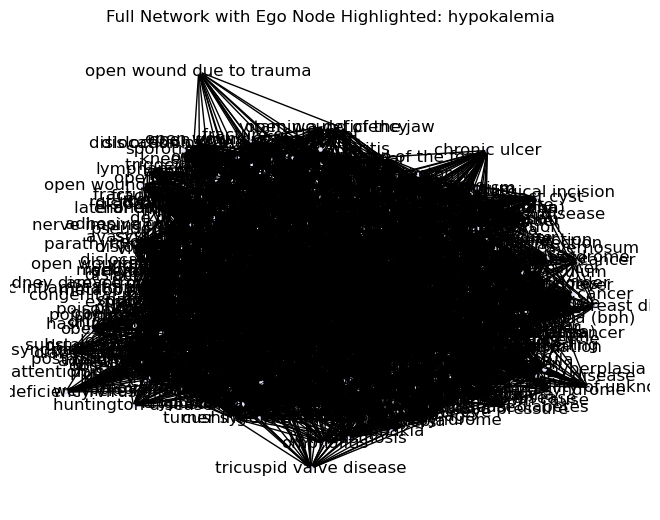

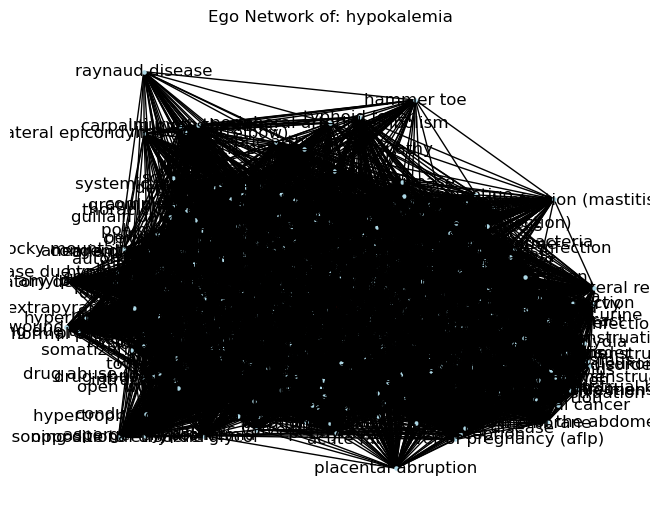

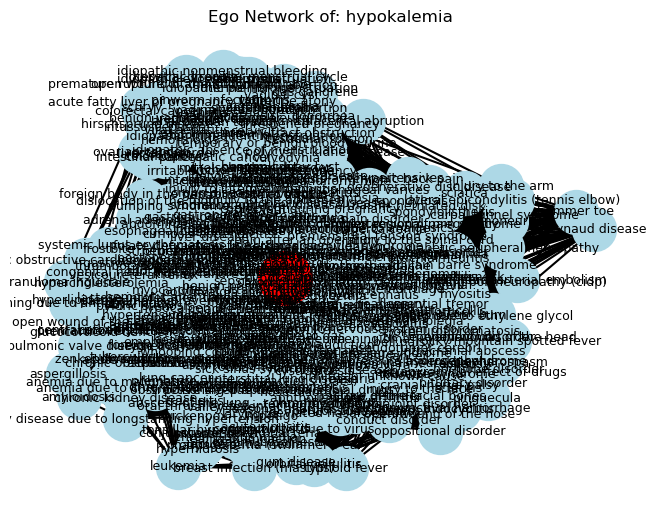

In [23]:
#nvm work in progress. 

import networkx as nx
import matplotlib.pyplot as plt

# Set the ego node 
ego = 'hypokalemia'

pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility

#full graph first
nx.draw(G, pos, node_color="lavender", node_size=5, with_labels=True)

#  ego node in red
nx.draw_networkx_nodes(G, pos, nodelist=[ego], node_color='red', node_size=10)

plt.title(f"Full Network with Ego Node Highlighted: {ego}")
plt.show()

# Create ego network (ego + its immediate neighbors)
ego_net = nx.ego_graph(G, ego)

# Draw the ego network
nx.draw(ego_net, pos, node_color="lightblue", node_size=5, with_labels=True)
nx.draw_networkx_nodes(ego_net, pos, nodelist=[ego], node_color='red', node_size=10)

plt.title(f"Ego Network of: {ego}")
plt.show()

ego_net = nx.ego_graph(G, ego, radius = 1)
ego_pos = nx.spring_layout(ego_net, seed=42)  # Layout only for ego net



nx.draw(ego_net, ego_pos, node_color="lightblue", node_size=1000,width = 1.5,  with_labels=True, font_size = 9)
nx.draw_networkx_nodes(ego_net, ego_pos, nodelist=[ego], node_color="red", node_size=1500)

plt.title(f"Ego Network of: {ego}")
plt.show()
